In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/student_data.csv')
df

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 37.2+ KB


In [6]:
import pandas_profiling
from pandas_profiling import ProfileReport
ProfileReport(df)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


<BarContainer object of 19 artists>

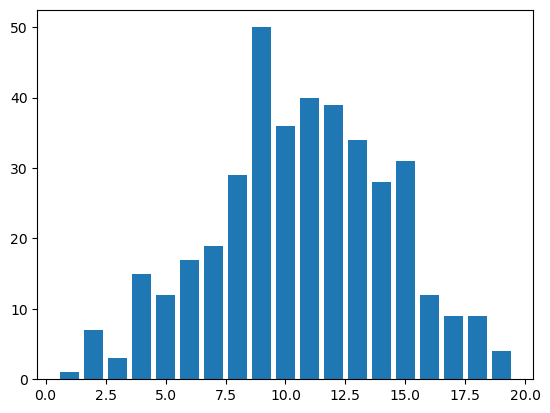

In [7]:
plt.bar(df['grade'].value_counts().index, df['grade'].value_counts().values)

<AxesSubplot:>

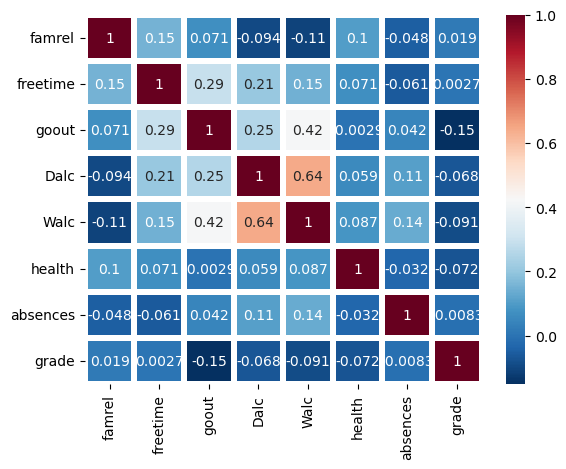

In [8]:
df_cor = df.corr(method='pearson')
sns.heatmap(df_cor, xticklabels=df_cor.columns, yticklabels=df_cor.columns,
            cmap='RdBu_r', annot=True, linewidths=3)

In [9]:
# 나머지 수치, 순위형 변수는 원핫인코딩 안함
# 이산형 변수(school, sex, paid, activities)는 boolean 타입으로 변경하여 KNN 이용한 결측치 처리 가능하도록
df.loc[df['school']=='GP', 'school'] = True
df.loc[df['school']=='MS', 'school'] = False

df.loc[df['sex']=='M', 'sex'] = True
df.loc[df['sex']=='F', 'sex'] = False

df.loc[df['paid']=='yes', 'paid'] = True
df.loc[df['paid']=='no', 'paid'] = False

df.loc[df['activities']=='yes', 'activities'] = True
df.loc[df['activities']=='no', 'activities'] = False

df

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,True,False,False,False,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6
1,True,False,False,False,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5
2,True,False,True,False,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8
3,True,False,True,True,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15
4,True,False,True,False,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,True,True,False,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9
391,False,True,False,False,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15
392,False,True,False,False,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8
393,False,True,False,False,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11


In [10]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(df)
pre_df = pd.DataFrame(df_filled, columns=df.columns)
pre_df

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,1.0,0.0,0.0,0.0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6.0
1,1.0,0.0,0.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0
2,1.0,0.0,1.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8.0
3,1.0,0.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0
4,1.0,0.0,1.0,0.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.0,1.0,1.0,0.0,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0
391,0.0,1.0,0.0,0.0,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15.0
392,0.0,1.0,0.0,0.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8.0
393,0.0,1.0,0.0,0.0,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0


In [11]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    float64
 1   sex         395 non-null    float64
 2   paid        395 non-null    float64
 3   activities  395 non-null    float64
 4   famrel      395 non-null    float64
 5   freetime    395 non-null    float64
 6   goout       395 non-null    float64
 7   Dalc        395 non-null    float64
 8   Walc        395 non-null    float64
 9   health      395 non-null    float64
 10  absences    395 non-null    float64
 11  grade       395 non-null    float64
dtypes: float64(12)
memory usage: 37.2 KB
